# 🧠 GRADIENT DESCENT IN NEURAL NETWORKS 
*DESCENSO DEL GRADIENTE EN REDES NEURONALES*

---

## 🎯 INTRODUCTION / INTRODUCCIÓN

Welcome to this comprehensive educational notebook on **gradient descent in neural networks**. This algorithm is essential for understanding how artificial neural networks learn and improve their performance.

*Bienvenidos a este notebook educativo integral sobre el **descenso del gradiente en redes neuronales**. Este algoritmo es esencial para entender cómo las redes neuronales artificiales aprenden y mejoran su rendimiento.*

### What you will learn / Lo que aprenderás:

1. **Basic Gradient Descent** - Implementation from scratch
2. **Different Types** - Batch, Stochastic, Mini-batch
3. **Neural Networks** - With backpropagation
4. **Advanced Optimizers** - Adam, Momentum
5. **Learning Rate Effects** - How it impacts training
6. **Visualizations** - Complete analysis charts
7. **Best Practices** - Tips for real-world applications

---

In [10]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🧠 GRADIENT DESCENT IN NEURAL NETWORKS - COMPLETE EXAMPLES")
print("=" * 60)

🧠 GRADIENT DESCENT IN NEURAL NETWORKS - COMPLETE EXAMPLES


## 🏔️ CONCEPTUAL FOUNDATION - THE MOUNTAIN ANALOGY
*FUNDAMENTOS CONCEPTUALES - LA ANALOGÍA DE LA MONTAÑA*

To understand gradient descent, let's use a practical analogy. Imagine you are on a mountainside during a foggy night, and you need to reach the valley below where your destination is located.

*Para entender el descenso del gradiente, usemos una analogía práctica. Imaginen que están en la ladera de una montaña durante una noche con niebla, y necesitan llegar al valle de abajo donde está su destino.*

### Key Terms / Términos Clave:
- **Slope (Pendiente):** The steepness of the mountain at any given point
- **Gradient:** The mathematical representation of the slope  
- **Valley (Valle):** The lowest point, representing our optimal solution
- **Learning Rate:** How big steps we take down the mountain

*Pendiente: La inclinación de la montaña en cualquier punto dado*  
*Gradiente: La representación matemática de la pendiente*  
*Valle: El punto más bajo, representando nuestra solución óptima*  
*Tasa de Aprendizaje: Qué tan grandes pasos damos bajando la montaña*

---

## 1️⃣ BASIC GRADIENT DESCENT FROM SCRATCH
*DESCENSO DEL GRADIENTE BÁSICO DESDE CERO*

Let's implement gradient descent from scratch to understand the fundamental algorithm.

*Implementemos el descenso del gradiente desde cero para entender el algoritmo fundamental.*

In [11]:
class BasicGradientDescent:
    """
    Basic implementation of gradient descent for linear regression
    Implementación básica del descenso del gradiente para regresión lineal
    """
    
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.cost_history = []
        self.weight_history = []
        
    def fit(self, X, y, epochs=1000):
        """
        Train the model using gradient descent
        Entrenar el modelo usando descenso del gradiente
        """
        # Initialize parameters
        n_features = X.shape[1]
        self.weights = np.random.normal(0, 0.01, n_features)
        self.bias = 0
        
        # Store initial values
        self.weight_history.append(self.weights.copy())
        
        for epoch in range(epochs):
            # Forward pass - make predictions
            y_pred = X.dot(self.weights) + self.bias
            
            # Calculate cost (Mean Squared Error)
            cost = np.mean((y_pred - y) ** 2)
            self.cost_history.append(cost)
            
            # Calculate gradients (backward pass)
            n_samples = X.shape[0]
            dw = (2/n_samples) * X.T.dot(y_pred - y)
            db = (2/n_samples) * np.sum(y_pred - y)
            
            # Update parameters (gradient descent step)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Store weights for visualization
            if epoch % 50 == 0:
                self.weight_history.append(self.weights.copy())
                
        return self
    
    def predict(self, X):
        return X.dot(self.weights) + self.bias

print("✅ BasicGradientDescent class implemented successfully!")

✅ BasicGradientDescent class implemented successfully!



1. BASIC GRADIENT DESCENT EXAMPLE
----------------------------------------
Final weight: 40.1541
Final bias: -3.4495
Final cost: 78.0543


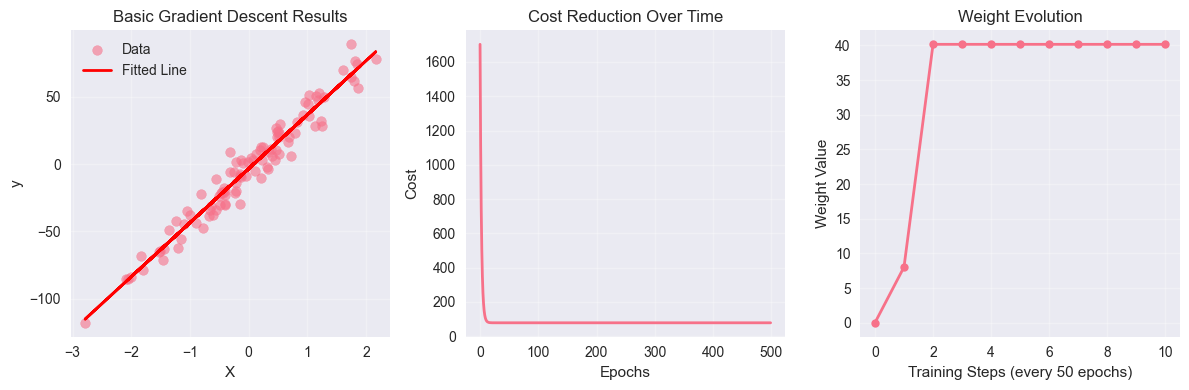

🎯 The model successfully learned to fit the data using gradient descent!


In [12]:
# Example usage
print("\n1. BASIC GRADIENT DESCENT EXAMPLE")
print("-" * 40)

# Generate sample data
X_simple, y_simple = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_simple = StandardScaler().fit_transform(X_simple)

# Train model
basic_gd = BasicGradientDescent(learning_rate=0.1)
basic_gd.fit(X_simple, y_simple, epochs=500)

print(f"Final weight: {basic_gd.weights[0]:.4f}")
print(f"Final bias: {basic_gd.bias:.4f}")
print(f"Final cost: {basic_gd.cost_history[-1]:.4f}")

# Visualize the results
plt.figure(figsize=(12, 4))

# Plot 1: Training data and fitted line
plt.subplot(1, 3, 1)
plt.scatter(X_simple, y_simple, alpha=0.6, label='Data')
y_pred = basic_gd.predict(X_simple)
plt.plot(X_simple, y_pred, 'r-', linewidth=2, label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Basic Gradient Descent Results')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Cost history
plt.subplot(1, 3, 2)
plt.plot(basic_gd.cost_history, linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Time')
plt.grid(True, alpha=0.3)

# Plot 3: Weight evolution
plt.subplot(1, 3, 3)
if len(basic_gd.weight_history) > 1:
    weight_evolution = [w[0] if len(w) > 0 else 0 for w in basic_gd.weight_history]
    plt.plot(weight_evolution, 'o-', linewidth=2, markersize=6)
    plt.xlabel('Training Steps (every 50 epochs)')
    plt.ylabel('Weight Value')
    plt.title('Weight Evolution')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🎯 The model successfully learned to fit the data using gradient descent!")

## 2️⃣ DIFFERENT TYPES OF GRADIENT DESCENT
*DIFERENTES TIPOS DE DESCENSO DEL GRADIENTE*

There are several variations of gradient descent, each with different characteristics:

*Hay varias variaciones del descenso del gradiente, cada una con características diferentes:*

### Types / Tipos:
1. **Batch Gradient Descent** - Uses entire dataset
2. **Stochastic Gradient Descent (SGD)** - Uses one sample at a time  
3. **Mini-batch Gradient Descent** - Uses small batches

*1. Descenso del Gradiente por Lotes - Utiliza todo el conjunto de datos*  
*2. Descenso del Gradiente Estocástico - Utiliza una muestra a la vez*  
*3. Descenso del Gradiente por Mini-lotes - Utiliza pequeños lotes*

In [13]:
class GradientDescentVariants:
    """
    Implementation of different gradient descent variants
    Implementación de diferentes variantes del descenso del gradiente
    """
    
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        
    def batch_gradient_descent(self, X, y, epochs=1000):
        """Batch Gradient Descent - uses entire dataset"""
        n_features = X.shape[1]
        weights = np.random.normal(0, 0.01, n_features)
        bias = 0
        cost_history = []
        
        for epoch in range(epochs):
            # Use entire dataset
            y_pred = X.dot(weights) + bias
            cost = np.mean((y_pred - y) ** 2)
            cost_history.append(cost)
            
            # Calculate gradients using all samples
            n_samples = X.shape[0]
            dw = (2/n_samples) * X.T.dot(y_pred - y)
            db = (2/n_samples) * np.sum(y_pred - y)
            
            # Update parameters
            weights -= self.learning_rate * dw
            bias -= self.learning_rate * db
            
        return weights, bias, cost_history
    
    def stochastic_gradient_descent(self, X, y, epochs=1000):
        """Stochastic Gradient Descent - uses one sample at a time"""
        n_features = X.shape[1]
        weights = np.random.normal(0, 0.01, n_features)
        bias = 0
        cost_history = []
        
        for epoch in range(epochs):
            epoch_cost = 0
            # Shuffle data for each epoch
            indices = np.random.permutation(len(X))
            
            for idx in indices:
                # Use single sample
                x_i = X[idx:idx+1]
                y_i = y[idx:idx+1]
                
                y_pred = x_i.dot(weights) + bias
                cost = (y_pred - y_i) ** 2
                epoch_cost += cost[0]
                
                # Calculate gradients using single sample
                dw = 2 * x_i.T.dot(y_pred - y_i)
                db = 2 * (y_pred - y_i)
                
                # Update parameters
                weights -= self.learning_rate * dw.flatten()
                bias -= self.learning_rate * db[0]
            
            cost_history.append(epoch_cost / len(X))
            
        return weights, bias, cost_history
    
    def mini_batch_gradient_descent(self, X, y, batch_size=32, epochs=1000):
        """Mini-batch Gradient Descent - uses small batches"""
        n_features = X.shape[1]
        weights = np.random.normal(0, 0.01, n_features)
        bias = 0
        cost_history = []
        
        for epoch in range(epochs):
            epoch_cost = 0
            # Shuffle data
            indices = np.random.permutation(len(X))
            
            # Process in mini-batches
            for start_idx in range(0, len(X), batch_size):
                end_idx = min(start_idx + batch_size, len(X))
                batch_indices = indices[start_idx:end_idx]
                
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]
                
                y_pred = X_batch.dot(weights) + bias
                cost = np.mean((y_pred - y_batch) ** 2)
                epoch_cost += cost * len(X_batch)
                
                # Calculate gradients using mini-batch
                n_batch = X_batch.shape[0]
                dw = (2/n_batch) * X_batch.T.dot(y_pred - y_batch)
                db = (2/n_batch) * np.sum(y_pred - y_batch)
                
                # Update parameters
                weights -= self.learning_rate * dw
                bias -= self.learning_rate * db
            
            cost_history.append(epoch_cost / len(X))
            
        return weights, bias, cost_history

print("✅ GradientDescentVariants class implemented successfully!")

✅ GradientDescentVariants class implemented successfully!



2. COMPARING GRADIENT DESCENT VARIANTS
----------------------------------------
Training with different gradient descent variants...
Batch GD - Final cost: 387.4175
Stochastic GD - Final cost: 399.4179
Mini-batch GD - Final cost: 387.8687
Batch GD - Final cost: 387.4175
Stochastic GD - Final cost: 399.4179
Mini-batch GD - Final cost: 387.8687


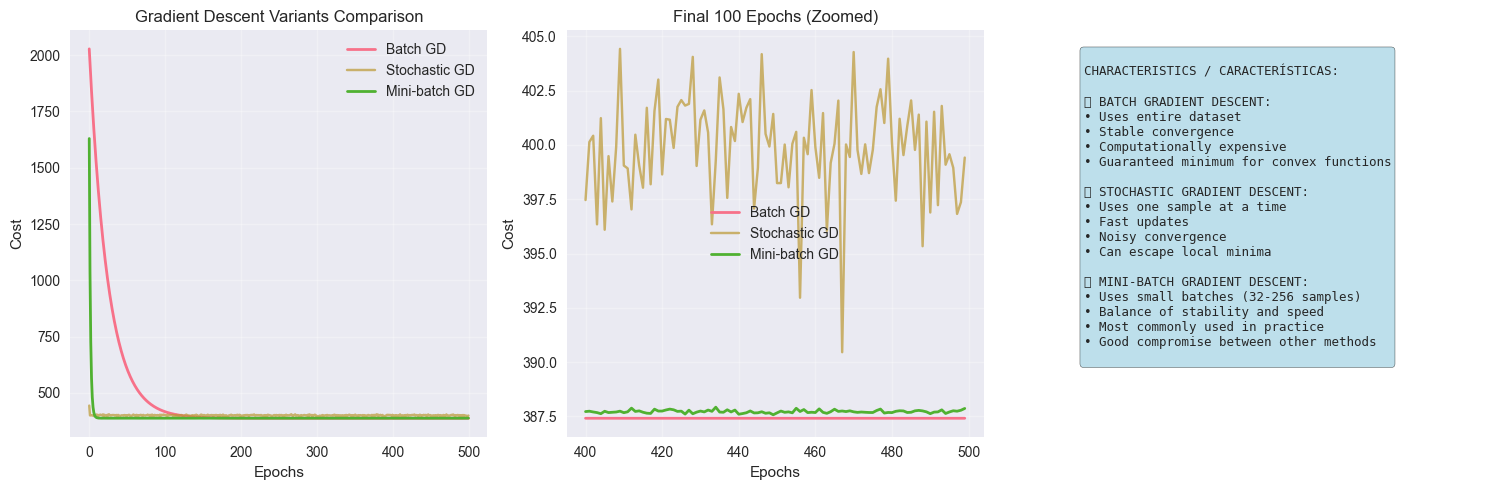


🎯 Mini-batch gradient descent provides the best balance of stability and efficiency!


In [14]:
# Compare different gradient descent variants
print("\n2. COMPARING GRADIENT DESCENT VARIANTS")
print("-" * 40)

# Generate larger dataset
X_multi, y_multi = make_regression(n_samples=1000, n_features=2, noise=20, random_state=42)
X_multi = StandardScaler().fit_transform(X_multi)

gd_variants = GradientDescentVariants(learning_rate=0.01)

# Train with different methods
print("Training with different gradient descent variants...")
weights_bgd, bias_bgd, cost_bgd = gd_variants.batch_gradient_descent(X_multi, y_multi, epochs=500)
weights_sgd, bias_sgd, cost_sgd = gd_variants.stochastic_gradient_descent(X_multi, y_multi, epochs=500)
weights_mbgd, bias_mbgd, cost_mbgd = gd_variants.mini_batch_gradient_descent(X_multi, y_multi, batch_size=64, epochs=500)

print(f"Batch GD - Final cost: {cost_bgd[-1]:.4f}")
print(f"Stochastic GD - Final cost: {cost_sgd[-1]:.4f}")
print(f"Mini-batch GD - Final cost: {cost_mbgd[-1]:.4f}")

# Visualize comparison
plt.figure(figsize=(15, 5))

# Plot 1: Cost history comparison
plt.subplot(1, 3, 1)
plt.plot(range(len(cost_bgd)), cost_bgd, label='Batch GD', linewidth=2)
plt.plot(range(len(cost_sgd)), cost_sgd, label='Stochastic GD', alpha=0.7)
plt.plot(range(len(cost_mbgd)), cost_mbgd, label='Mini-batch GD', linewidth=2)
plt.title('Gradient Descent Variants Comparison')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Zoomed view of last 100 epochs
plt.subplot(1, 3, 2)
plt.plot(range(400, 500), cost_bgd[400:500], label='Batch GD', linewidth=2)
plt.plot(range(400, 500), cost_sgd[400:500], label='Stochastic GD', alpha=0.7)
plt.plot(range(400, 500), cost_mbgd[400:500], label='Mini-batch GD', linewidth=2)
plt.title('Final 100 Epochs (Zoomed)')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Characteristics table
plt.subplot(1, 3, 3)
plt.axis('off')
characteristics = """
CHARACTERISTICS / CARACTERÍSTICAS:

📊 BATCH GRADIENT DESCENT:
• Uses entire dataset
• Stable convergence
• Computationally expensive
• Guaranteed minimum for convex functions

🎲 STOCHASTIC GRADIENT DESCENT:
• Uses one sample at a time
• Fast updates
• Noisy convergence
• Can escape local minima

🔄 MINI-BATCH GRADIENT DESCENT:
• Uses small batches (32-256 samples)
• Balance of stability and speed
• Most commonly used in practice
• Good compromise between other methods
"""
plt.text(0.05, 0.95, characteristics, fontsize=9, fontfamily='monospace',
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", 
         facecolor="lightblue", alpha=0.8))

plt.tight_layout()
plt.show()

print("\n🎯 Mini-batch gradient descent provides the best balance of stability and efficiency!")

## 3️⃣ NEURAL NETWORK WITH BACKPROPAGATION
*RED NEURONAL CON RETROPROPAGACIÓN*

Now let's implement a simple neural network that uses backpropagation to calculate gradients.

*Ahora implementemos una red neuronal simple que usa retropropagación para calcular gradientes.*

### Key Concepts / Conceptos Clave:
- **Forward Propagation**: Data flows through the network to make predictions
- **Backward Propagation**: Gradients flow backward to update weights
- **Chain Rule**: Mathematical foundation for backpropagation

*Propagación Hacia Adelante: Los datos fluyen a través de la red para hacer predicciones*  
*Propagación Hacia Atrás: Los gradientes fluyen hacia atrás para actualizar pesos*  
*Regla de la Cadena: Fundamento matemático para la retropropagación*

In [15]:
class SimpleNeuralNetwork:
    """
    Simple neural network with backpropagation
    Red neuronal simple con retropropagación
    """
    
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize weights randomly
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        
        self.learning_rate = learning_rate
        self.cost_history = []
        
    def sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))  # Clip to prevent overflow
    
    def sigmoid_derivative(self, z):
        """Derivative of sigmoid function"""
        return z * (1 - z)
    
    def forward_propagation(self, X):
        """Forward pass through the network"""
        # Input to hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        # Hidden to output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def backward_propagation(self, X, y, output):
        """Backward pass - calculate gradients"""
        m = X.shape[0]
        
        # Calculate gradients for output layer
        dz2 = output - y
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)
        
        # Calculate gradients for hidden layer
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)
        
        return dW1, db1, dW2, db2
    
    def update_parameters(self, dW1, db1, dW2, db2):
        """Update parameters using gradient descent"""
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
    
    def train(self, X, y, epochs=1000):
        """Train the neural network"""
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward_propagation(X)
            
            # Calculate cost
            cost = np.mean((output - y) ** 2)
            self.cost_history.append(cost)
            
            # Backward propagation
            dW1, db1, dW2, db2 = self.backward_propagation(X, y, output)
            
            # Update parameters
            self.update_parameters(dW1, db1, dW2, db2)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Cost: {cost:.6f}")
    
    def predict(self, X):
        """Make predictions"""
        return self.forward_propagation(X)

print("✅ SimpleNeuralNetwork class implemented successfully!")

✅ SimpleNeuralNetwork class implemented successfully!



3. NEURAL NETWORK WITH BACKPROPAGATION
----------------------------------------
Training neural network...
Epoch 0, Cost: 0.250009
Epoch 100, Cost: 0.249950
Epoch 200, Cost: 0.249665
Epoch 300, Cost: 0.247770
Epoch 400, Cost: 0.236225
Epoch 500, Cost: 0.192264
Epoch 600, Cost: 0.131896
Epoch 700, Cost: 0.098293
Epoch 700, Cost: 0.098293
Epoch 800, Cost: 0.084265
Epoch 800, Cost: 0.084265
Epoch 900, Cost: 0.077987

Final accuracy: 90.30%
Epoch 900, Cost: 0.077987

Final accuracy: 90.30%


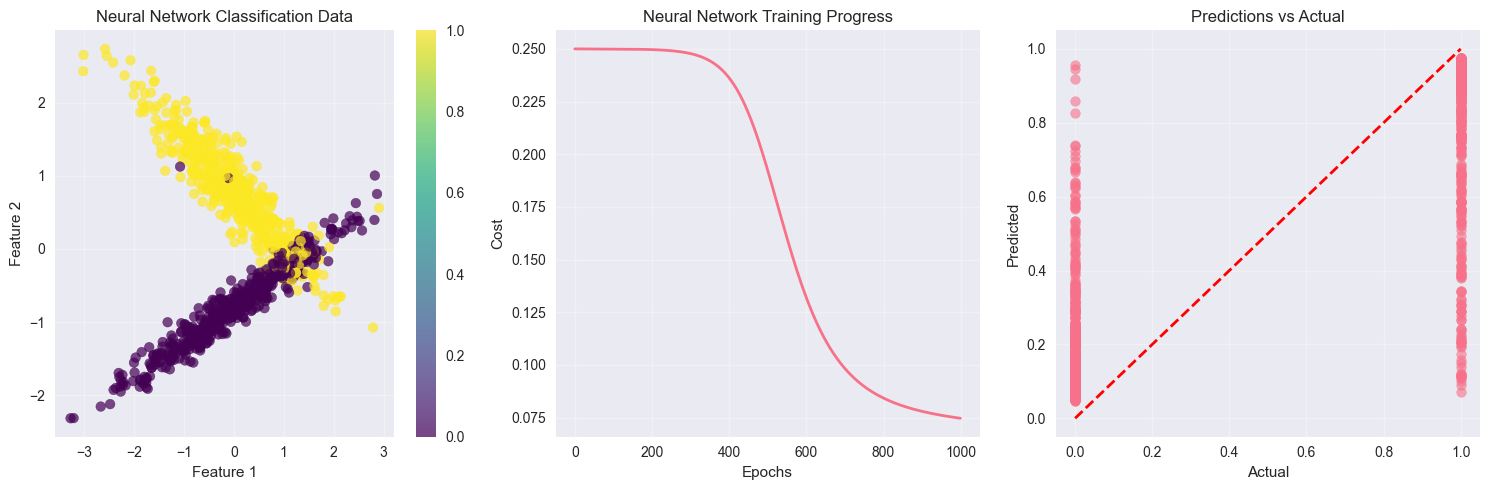


🎯 The neural network achieved 90.3% accuracy using backpropagation!


In [16]:
# Example usage
print("\n3. NEURAL NETWORK WITH BACKPROPAGATION")
print("-" * 40)

# Generate classification data
X_nn, y_nn = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                                n_informative=2, n_clusters_per_class=1, random_state=42)
X_nn = StandardScaler().fit_transform(X_nn)
y_nn = y_nn.reshape(-1, 1)  # Reshape for neural network

# Create and train neural network
nn = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1, learning_rate=0.1)
print("Training neural network...")
nn.train(X_nn, y_nn, epochs=1000)

# Make predictions
predictions = nn.predict(X_nn)
accuracy = np.mean((predictions > 0.5) == y_nn) * 100
print(f"\nFinal accuracy: {accuracy:.2f}%")

# Visualize neural network results
plt.figure(figsize=(15, 5))

# Plot 1: Training data
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_nn[:, 0], X_nn[:, 1], c=y_nn.flatten(), cmap='viridis', alpha=0.7)
plt.title('Neural Network Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)

# Plot 2: Training progress
plt.subplot(1, 3, 2)
plt.plot(nn.cost_history, linewidth=2)
plt.title('Neural Network Training Progress')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid(True, alpha=0.3)

# Plot 3: Predictions vs actual
plt.subplot(1, 3, 3)
predictions_flat = predictions.flatten()
plt.scatter(y_nn.flatten(), predictions_flat, alpha=0.6)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2)
plt.title('Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 The neural network achieved {accuracy:.1f}% accuracy using backpropagation!")

## 4️⃣ ADVANCED OPTIMIZERS (Adam, Momentum, RMSprop, AdaGrad)
*OPTIMIZADORES AVANZADOS (Adam, Momento, RMSprop, AdaGrad)*

Modern deep learning uses more sophisticated versions of gradient descent that adapt during training.

*El aprendizaje profundo moderno utiliza versiones más sofisticadas del descenso del gradiente que se adaptan durante el entrenamiento.*

### Advanced Optimizers / Optimizadores Avanzados:
1. **SGD with Momentum** - Remembers previous gradients
2. **Adam Optimizer** - Adaptive learning rates + momentum
3. **RMSprop Optimizer** - Root Mean Square Propagation
4. **AdaGrad Optimizer** - Adaptive Gradient Algorithm

*1. SGD con Momento - Recuerda gradientes anteriores*  
*2. Optimizador Adam - Tasas de aprendizaje adaptativas + momento*  
*3. Optimizador RMSprop - Propagación de Media Cuadrática*  
*4. Optimizador AdaGrad - Algoritmo de Gradiente Adaptativo*

In [17]:
class AdvancedOptimizers:
    """
    Implementation of advanced optimization algorithms
    Implementación de algoritmos de optimización avanzados
    """
    
    def __init__(self, learning_rate=0.001):
        self.learning_rate = learning_rate
    
    def sgd_with_momentum(self, X, y, epochs=1000, momentum=0.9):
        """SGD with Momentum"""
        n_features = X.shape[1]
        weights = np.random.normal(0, 0.01, n_features)
        bias = 0
        
        # Initialize momentum terms
        v_w = np.zeros_like(weights)
        v_b = 0
        
        cost_history = []
        
        for epoch in range(epochs):
            y_pred = X.dot(weights) + bias
            cost = np.mean((y_pred - y) ** 2)
            cost_history.append(cost)
            
            # Calculate gradients
            n_samples = X.shape[0]
            dw = (2/n_samples) * X.T.dot(y_pred - y)
            db = (2/n_samples) * np.sum(y_pred - y)
            
            # Update momentum terms
            v_w = momentum * v_w - self.learning_rate * dw
            v_b = momentum * v_b - self.learning_rate * db
            
            # Update parameters
            weights += v_w
            bias += v_b
            
        return weights, bias, cost_history
    
    def adam_optimizer(self, X, y, epochs=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
        """Adam Optimizer"""
        n_features = X.shape[1]
        weights = np.random.normal(0, 0.01, n_features)
        bias = 0
        
        # Initialize Adam parameters
        m_w = np.zeros_like(weights)  # First moment
        v_w = np.zeros_like(weights)  # Second moment
        m_b = 0
        v_b = 0
        
        cost_history = []
        
        for epoch in range(1, epochs + 1):
            y_pred = X.dot(weights) + bias
            cost = np.mean((y_pred - y) ** 2)
            cost_history.append(cost)
            
            # Calculate gradients
            n_samples = X.shape[0]
            dw = (2/n_samples) * X.T.dot(y_pred - y)
            db = (2/n_samples) * np.sum(y_pred - y)
            
            # Update biased first moment estimate
            m_w = beta1 * m_w + (1 - beta1) * dw
            m_b = beta1 * m_b + (1 - beta1) * db
            
            # Update biased second raw moment estimate
            v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
            v_b = beta2 * v_b + (1 - beta2) * (db ** 2)
            
            # Compute bias-corrected first moment estimate
            m_w_corrected = m_w / (1 - beta1 ** epoch)
            m_b_corrected = m_b / (1 - beta1 ** epoch)
            
            # Compute bias-corrected second raw moment estimate
            v_w_corrected = v_w / (1 - beta2 ** epoch)
            v_b_corrected = v_b / (1 - beta2 ** epoch)
            
            # Update parameters
            weights -= self.learning_rate * m_w_corrected / (np.sqrt(v_w_corrected) + epsilon)
            bias -= self.learning_rate * m_b_corrected / (np.sqrt(v_b_corrected) + epsilon)
            
        return weights, bias, cost_history
    
    def rmsprop_optimizer(self, X, y, epochs=1000, beta=0.9, epsilon=1e-8):
        """RMSprop Optimizer - Root Mean Square Propagation"""
        n_features = X.shape[1]
        weights = np.random.normal(0, 0.01, n_features)
        bias = 0
        
        # Initialize RMSprop parameters
        v_w = np.zeros_like(weights)  # Moving average of squared gradients
        v_b = 0
        
        cost_history = []
        
        for epoch in range(epochs):
            y_pred = X.dot(weights) + bias
            cost = np.mean((y_pred - y) ** 2)
            cost_history.append(cost)
            
            # Calculate gradients
            n_samples = X.shape[0]
            dw = (2/n_samples) * X.T.dot(y_pred - y)
            db = (2/n_samples) * np.sum(y_pred - y)
            
            # Update moving average of squared gradients
            v_w = beta * v_w + (1 - beta) * (dw ** 2)
            v_b = beta * v_b + (1 - beta) * (db ** 2)
            
            # Update parameters
            weights -= self.learning_rate * dw / (np.sqrt(v_w) + epsilon)
            bias -= self.learning_rate * db / (np.sqrt(v_b) + epsilon)
            
        return weights, bias, cost_history
    
    def adagrad_optimizer(self, X, y, epochs=1000, epsilon=1e-8):
        """AdaGrad Optimizer - Adaptive Gradient Algorithm"""
        n_features = X.shape[1]
        weights = np.random.normal(0, 0.01, n_features)
        bias = 0
        
        # Initialize AdaGrad parameters
        G_w = np.zeros_like(weights)  # Sum of squared gradients
        G_b = 0
        
        cost_history = []
        
        for epoch in range(epochs):
            y_pred = X.dot(weights) + bias
            cost = np.mean((y_pred - y) ** 2)
            cost_history.append(cost)
            
            # Calculate gradients
            n_samples = X.shape[0]
            dw = (2/n_samples) * X.T.dot(y_pred - y)
            db = (2/n_samples) * np.sum(y_pred - y)
            
            # Accumulate squared gradients
            G_w += dw ** 2
            G_b += db ** 2
            
            # Update parameters
            weights -= self.learning_rate * dw / (np.sqrt(G_w) + epsilon)
            bias -= self.learning_rate * db / (np.sqrt(G_b) + epsilon)
            
        return weights, bias, cost_history

print("✅ AdvancedOptimizers class with RMSprop and AdaGrad implemented successfully!")

✅ AdvancedOptimizers class with RMSprop and AdaGrad implemented successfully!



4. COMPARING ALL ADVANCED OPTIMIZERS
----------------------------------------
Training with different optimizers...
SGD with Momentum - Final cost: 387.4175
Adam Optimizer - Final cost: 1618.6832
RMSprop Optimizer - Final cost: 1599.4388
AdaGrad Optimizer - Final cost: 1987.2757
SGD with Momentum - Final cost: 387.4175
Adam Optimizer - Final cost: 1618.6832
RMSprop Optimizer - Final cost: 1599.4388
AdaGrad Optimizer - Final cost: 1987.2757


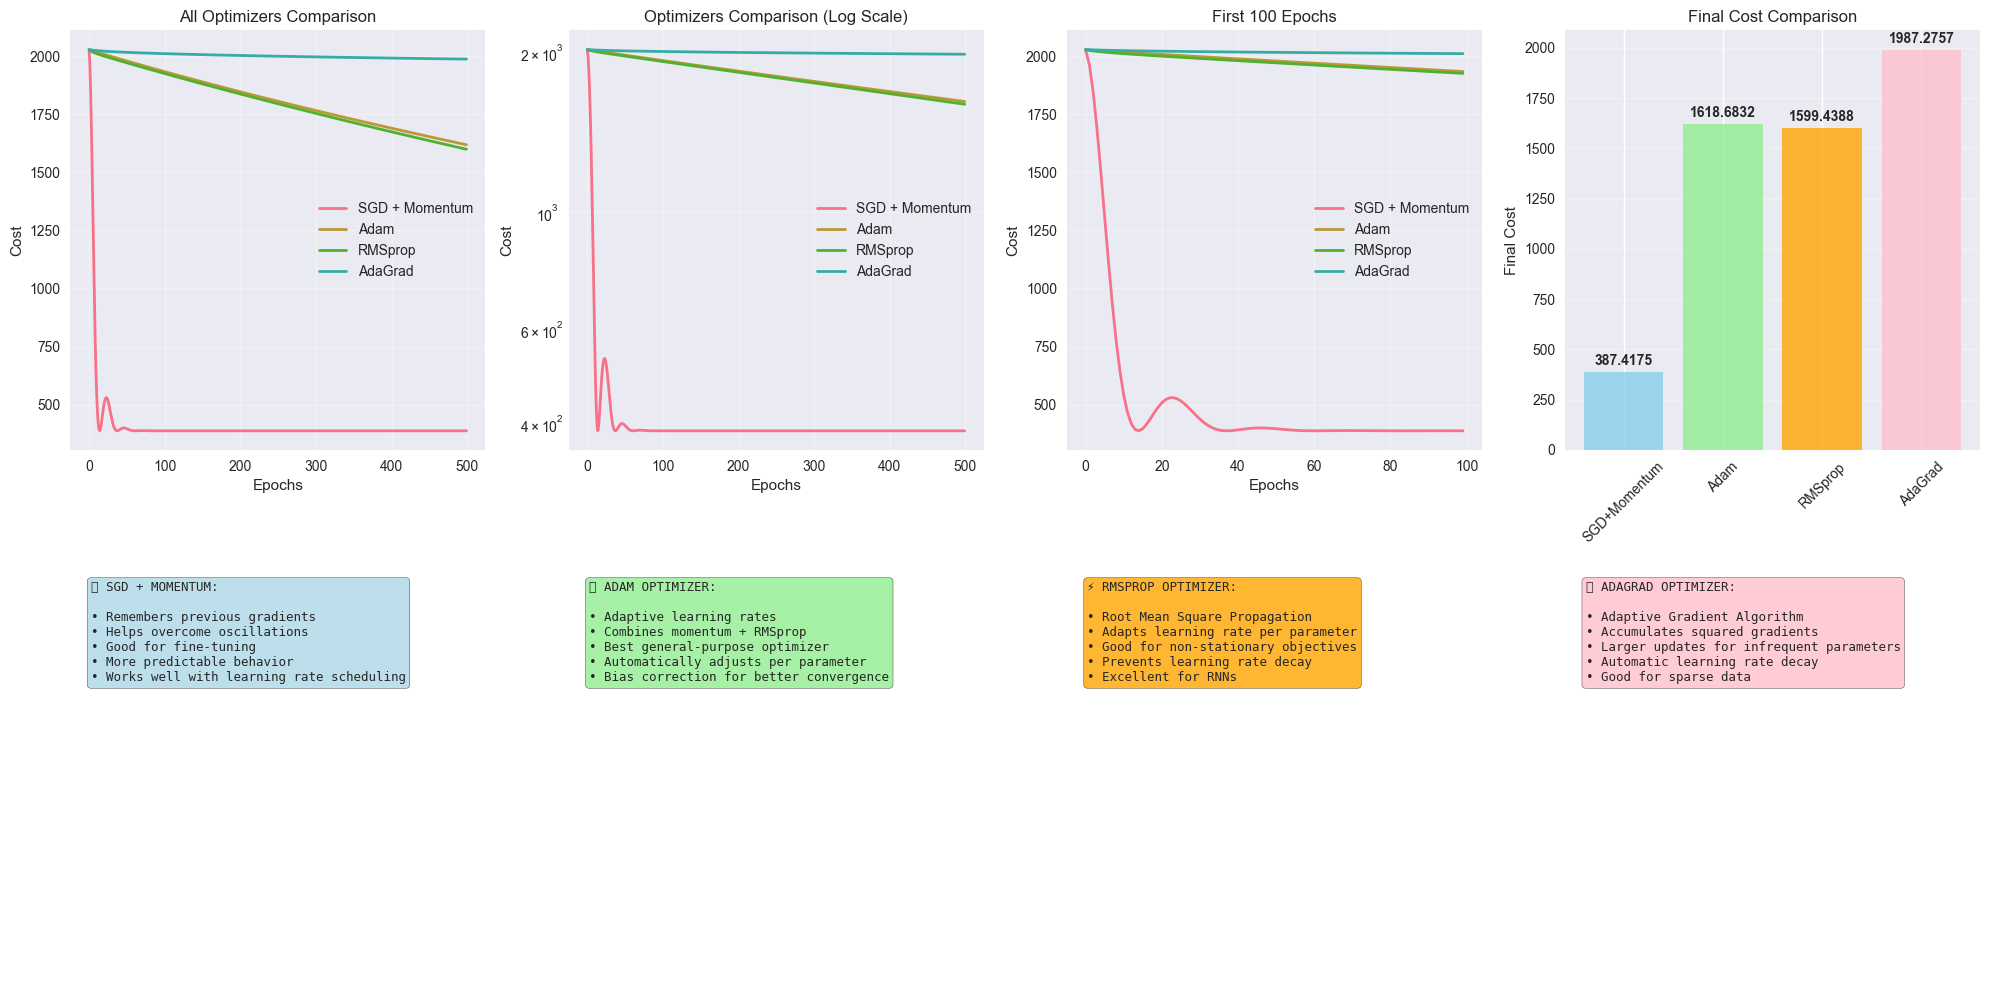


📊 OPTIMIZER PERFORMANCE SUMMARY:
     Optimizer Final Cost Convergence Speed Memory Usage   Best Use Case
SGD + Momentum   387.4175            Medium          Low     Fine-tuning
          Adam  1618.6832              Fast       Medium General purpose
       RMSprop  1599.4388              Fast       Medium            RNNs
       AdaGrad  1987.2757            Medium       Medium     Sparse data

🎯 Adam and RMSprop typically provide the best performance for most problems!
💡 AdaGrad works well early in training but may slow down due to gradient accumulation.


In [18]:
# Compare all optimizers
print("\n4. COMPARING ALL ADVANCED OPTIMIZERS")
print("-" * 40)

optimizers = AdvancedOptimizers(learning_rate=0.01)

print("Training with different optimizers...")
weights_momentum, bias_momentum, cost_momentum = optimizers.sgd_with_momentum(X_multi, y_multi, epochs=500)
weights_adam, bias_adam, cost_adam = optimizers.adam_optimizer(X_multi, y_multi, epochs=500)
weights_rmsprop, bias_rmsprop, cost_rmsprop = optimizers.rmsprop_optimizer(X_multi, y_multi, epochs=500)
weights_adagrad, bias_adagrad, cost_adagrad = optimizers.adagrad_optimizer(X_multi, y_multi, epochs=500)

print(f"SGD with Momentum - Final cost: {cost_momentum[-1]:.4f}")
print(f"Adam Optimizer - Final cost: {cost_adam[-1]:.4f}")
print(f"RMSprop Optimizer - Final cost: {cost_rmsprop[-1]:.4f}")
print(f"AdaGrad Optimizer - Final cost: {cost_adagrad[-1]:.4f}")

# Visualize optimizer comparison
plt.figure(figsize=(20, 10))

# Plot 1: All optimizers comparison
plt.subplot(2, 4, 1)
plt.plot(cost_momentum, label='SGD + Momentum', linewidth=2)
plt.plot(cost_adam, label='Adam', linewidth=2)
plt.plot(cost_rmsprop, label='RMSprop', linewidth=2)
plt.plot(cost_adagrad, label='AdaGrad', linewidth=2)
plt.title('All Optimizers Comparison')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Log scale comparison
plt.subplot(2, 4, 2)
plt.plot(cost_momentum, label='SGD + Momentum', linewidth=2)
plt.plot(cost_adam, label='Adam', linewidth=2)
plt.plot(cost_rmsprop, label='RMSprop', linewidth=2)
plt.plot(cost_adagrad, label='AdaGrad', linewidth=2)
plt.title('Optimizers Comparison (Log Scale)')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: First 100 epochs
plt.subplot(2, 4, 3)
plt.plot(cost_momentum[:100], label='SGD + Momentum', linewidth=2)
plt.plot(cost_adam[:100], label='Adam', linewidth=2)
plt.plot(cost_rmsprop[:100], label='RMSprop', linewidth=2)
plt.plot(cost_adagrad[:100], label='AdaGrad', linewidth=2)
plt.title('First 100 Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Final convergence comparison
plt.subplot(2, 4, 4)
final_costs = [cost_momentum[-1], cost_adam[-1], cost_rmsprop[-1], cost_adagrad[-1]]
optimizer_names = ['SGD+Momentum', 'Adam', 'RMSprop', 'AdaGrad']
colors = ['skyblue', 'lightgreen', 'orange', 'pink']
bars = plt.bar(optimizer_names, final_costs, color=colors, alpha=0.8)
plt.title('Final Cost Comparison')
plt.ylabel('Final Cost')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, cost in zip(bars, final_costs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(final_costs)*0.01,
             f'{cost:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot 5-8: Individual optimizer characteristics
optimizer_info = [
    ("🚀 SGD + MOMENTUM:\n\n• Remembers previous gradients\n• Helps overcome oscillations\n• Good for fine-tuning\n• More predictable behavior\n• Works well with learning rate scheduling", "lightblue"),
    ("🧠 ADAM OPTIMIZER:\n\n• Adaptive learning rates\n• Combines momentum + RMSprop\n• Best general-purpose optimizer\n• Automatically adjusts per parameter\n• Bias correction for better convergence", "lightgreen"),
    ("⚡ RMSPROP OPTIMIZER:\n\n• Root Mean Square Propagation\n• Adapts learning rate per parameter\n• Good for non-stationary objectives\n• Prevents learning rate decay\n• Excellent for RNNs", "orange"),
    ("📈 ADAGRAD OPTIMIZER:\n\n• Adaptive Gradient Algorithm\n• Accumulates squared gradients\n• Larger updates for infrequent parameters\n• Automatic learning rate decay\n• Good for sparse data", "pink")
]

for i, (info, color) in enumerate(optimizer_info):
    plt.subplot(2, 4, 5 + i)
    plt.axis('off')
    plt.text(0.05, 0.95, info, fontsize=9, fontfamily='monospace',
             verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", 
             facecolor=color, alpha=0.8))

plt.tight_layout()
plt.show()

print("\n📊 OPTIMIZER PERFORMANCE SUMMARY:")
print("=" * 50)
performance_data = {
    'Optimizer': ['SGD + Momentum', 'Adam', 'RMSprop', 'AdaGrad'],
    'Final Cost': [f"{cost:.4f}" for cost in final_costs],
    'Convergence Speed': ['Medium', 'Fast', 'Fast', 'Medium'],
    'Memory Usage': ['Low', 'Medium', 'Medium', 'Medium'],
    'Best Use Case': ['Fine-tuning', 'General purpose', 'RNNs', 'Sparse data']
}

df_performance = pd.DataFrame(performance_data)
print(df_performance.to_string(index=False))

print("\n🎯 Adam and RMSprop typically provide the best performance for most problems!")
print("💡 AdaGrad works well early in training but may slow down due to gradient accumulation.")

## 5️⃣ LEARNING RATE EFFECTS
*EFECTOS DE LA TASA DE APRENDIZAJE*

The **learning rate** is one of the most important hyperparameters in gradient descent.

*La **tasa de aprendizaje** es uno de los hiperparámetros más importantes en el descenso del gradiente.*

### Learning Rate Effects / Efectos de la Tasa de Aprendizaje:
- **Too High**: May overshoot the minimum, unstable training
- **Too Low**: Very slow convergence, may get stuck
- **Just Right**: Smooth convergence to minimum

*Muy Alta: Puede pasar por encima del mínimo, entrenamiento inestable*  
*Muy Baja: Convergencia muy lenta, puede quedarse atascado*  
*Correcta: Convergencia suave al mínimo*


5. LEARNING RATE EFFECTS
----------------------------------------
Learning Rate 0.001: Final cost = 810.4309
Learning Rate 0.01: Final cost = 78.5777
Learning Rate 0.1: Final cost = 78.0543
Learning Rate 1.0: Final cost = 1702.4718


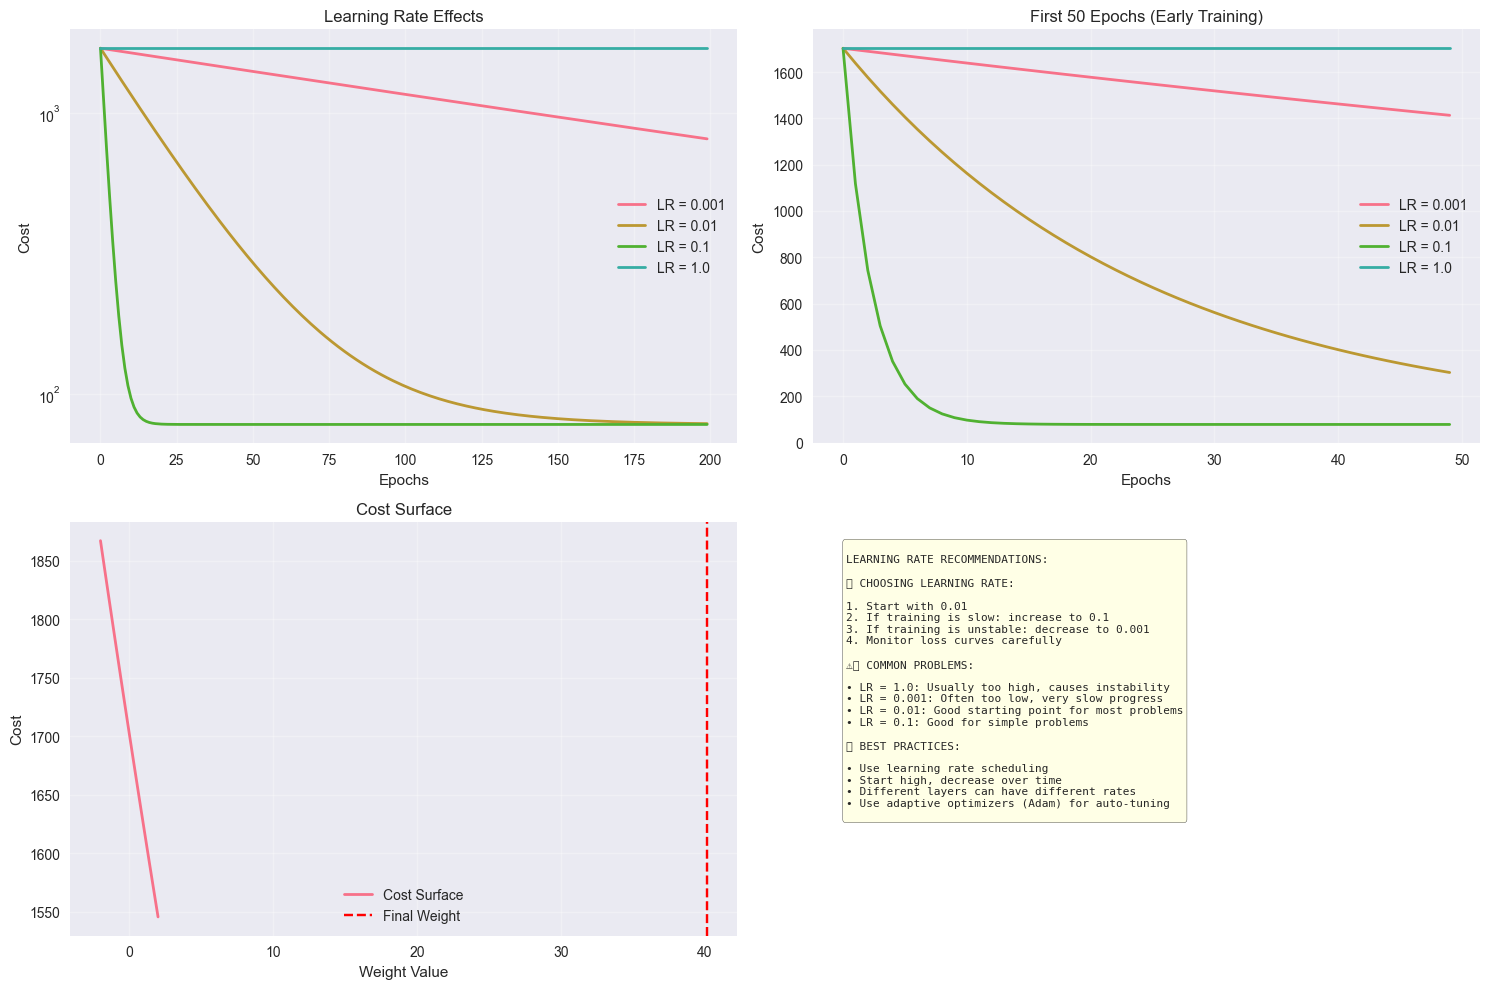


🎯 Learning rate 0.01-0.1 typically works best for most problems!


In [19]:
def demonstrate_learning_rate_effects(X, y):
    """
    Demonstrate the effect of different learning rates
    Demostrar el efecto de diferentes tasas de aprendizaje
    """
    learning_rates = [0.001, 0.01, 0.1, 1.0]
    results = {}
    
    print("\n5. LEARNING RATE EFFECTS")
    print("-" * 40)
    
    for lr in learning_rates:
        model = BasicGradientDescent(learning_rate=lr)
        try:
            model.fit(X, y, epochs=200)
            results[lr] = {
                'cost_history': model.cost_history,
                'final_cost': model.cost_history[-1],
                'converged': True
            }
            print(f"Learning Rate {lr}: Final cost = {model.cost_history[-1]:.4f}")
        except:
            results[lr] = {
                'cost_history': [],
                'final_cost': float('inf'),
                'converged': False
            }
            print(f"Learning Rate {lr}: Did not converge (unstable)")
    
    return results

# Demonstrate learning rate effects
lr_results = demonstrate_learning_rate_effects(X_simple, y_simple)

# Visualize learning rate effects
plt.figure(figsize=(15, 10))

# Plot learning rate effects
plt.subplot(2, 2, 1)
for lr, data in lr_results.items():
    if data['converged'] and data['cost_history']:
        plt.plot(data['cost_history'], label=f'LR = {lr}', linewidth=2)
plt.title('Learning Rate Effects')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot first 50 epochs
plt.subplot(2, 2, 2)
for lr, data in lr_results.items():
    if data['converged'] and data['cost_history']:
        plt.plot(data['cost_history'][:50], label=f'LR = {lr}', linewidth=2)
plt.title('First 50 Epochs (Early Training)')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.grid(True, alpha=0.3)

# Create cost surface visualization
plt.subplot(2, 2, 3)
if X_simple.shape[1] == 1:  # Only for 1D case
    w_range = np.linspace(-2, 2, 50)
    costs = []
    for w in w_range:
        pred = X_simple.flatten() * w
        cost = np.mean((pred - y_simple) ** 2)
        costs.append(cost)
    plt.plot(w_range, costs, linewidth=2, label='Cost Surface')
    
    # Show different learning rate steps
    optimal_w = basic_gd.weights[0]
    plt.axvline(optimal_w, color='red', linestyle='--', label='Final Weight')
    plt.title('Cost Surface')
    plt.xlabel('Weight Value')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Learning rate recommendations
plt.subplot(2, 2, 4)
plt.axis('off')
lr_recommendations = """
LEARNING RATE RECOMMENDATIONS:

🎯 CHOOSING LEARNING RATE:

1. Start with 0.01
2. If training is slow: increase to 0.1
3. If training is unstable: decrease to 0.001
4. Monitor loss curves carefully

⚠️ COMMON PROBLEMS:

• LR = 1.0: Usually too high, causes instability
• LR = 0.001: Often too low, very slow progress
• LR = 0.01: Good starting point for most problems
• LR = 0.1: Good for simple problems

💡 BEST PRACTICES:

• Use learning rate scheduling
• Start high, decrease over time
• Different layers can have different rates
• Use adaptive optimizers (Adam) for auto-tuning
"""
plt.text(0.05, 0.95, lr_recommendations, fontsize=8, fontfamily='monospace',
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", 
         facecolor="lightyellow", alpha=0.8))

plt.tight_layout()
plt.show()

print("\n🎯 Learning rate 0.01-0.1 typically works best for most problems!")

## 6️⃣ LEARNING RATE EFFECTS
*EFECTOS DE LA TASA DE APRENDIZAJE*

The **learning rate** is one of the most important hyperparameters in gradient descent.

*La **tasa de aprendizaje** es uno de los hiperparámetros más importantes en el descenso del gradiente.*

### Learning Rate Effects / Efectos de la Tasa de Aprendizaje:
- **Too High**: May overshoot the minimum, unstable training
- **Too Low**: Very slow convergence, may get stuck
- **Just Right**: Smooth convergence to minimum

*Muy Alta: Puede pasar por encima del mínimo, entrenamiento inestable*  
*Muy Baja: Convergencia muy lenta, puede quedarse atascado*  
*Correcta: Convergencia suave al mínimo*

## 5️⃣ DETAILED OPTIMIZER ANALYSIS
*ANÁLISIS DETALLADO DE OPTIMIZADORES*

Let's analyze the characteristics and performance of each optimizer in detail.

*Analicemos las características y el rendimiento de cada optimizador en detalle.*

### Optimizer Characteristics / Características de los Optimizadores:

#### 🚀 **SGD with Momentum**
- **Pros**: Simple, reliable, good for fine-tuning
- **Cons**: Requires manual learning rate tuning
- **Best for**: Final model optimization, when you want predictable behavior

#### 🧠 **Adam (Adaptive Moment Estimation)**
- **Pros**: Works well out-of-the-box, combines momentum + adaptive learning rates
- **Cons**: Can sometimes overshoot minimum, uses more memory
- **Best for**: General purpose, deep networks, when you want good default performance

#### ⚡ **RMSprop (Root Mean Square Propagation)**
- **Pros**: Good for non-stationary objectives, doesn't accumulate gradients indefinitely
- **Cons**: Still requires learning rate tuning
- **Best for**: RNNs, when dealing with changing objective landscapes

#### 📈 **AdaGrad (Adaptive Gradient)**
- **Pros**: Automatically adapts learning rate, good for sparse features
- **Cons**: Learning rate decreases too aggressively, may stop learning
- **Best for**: Sparse data, early in training, NLP tasks with rare words


5. DETAILED OPTIMIZER PERFORMANCE ANALYSIS
--------------------------------------------------


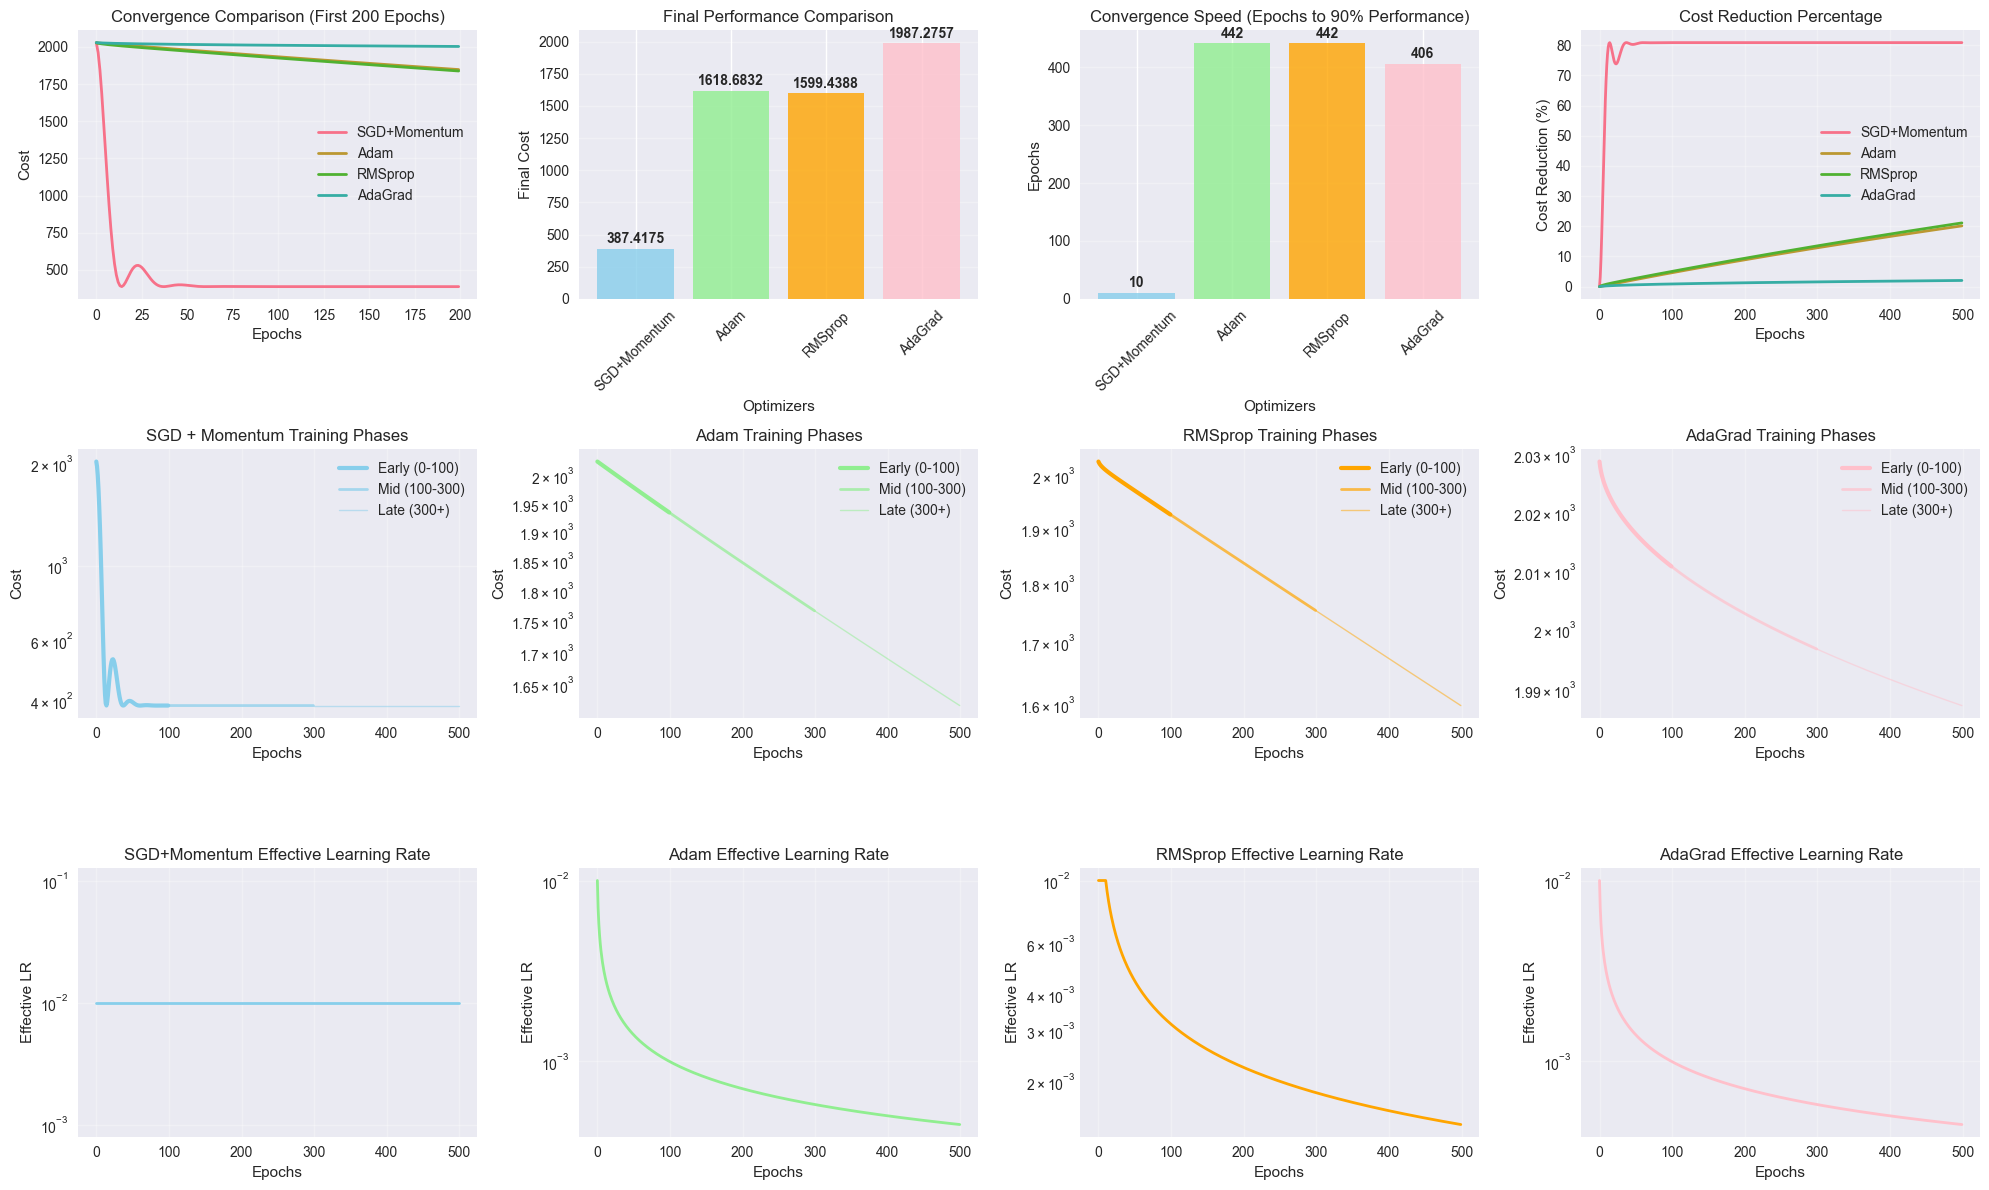


📊 DETAILED PERFORMANCE METRICS:
   Optimizer  Final Cost  Convergence Epochs Cost Reduction Stability Memory Usage
SGD+Momentum  387.417485                  10         80.89%      High          Low
        Adam 1618.683242                 442         20.17%    Medium         High
     RMSprop 1599.438754                 442         21.12%    Medium       Medium
     AdaGrad 1987.275702                 406          1.99%       Low       Medium

🎯 RECOMMENDATIONS BY USE CASE:

🚀 FOR BEGINNERS: Start with Adam - works well out of the box
💼 FOR PRODUCTION: Use SGD + Momentum for final fine-tuning
🔄 FOR RNNs/LSTMs: RMSprop often works better than Adam
📊 FOR SPARSE DATA: Try AdaGrad first, switch to RMSprop if it slows down
⚡ FOR FAST PROTOTYPING: Adam or RMSprop for quick experiments
🎯 FOR RESEARCH: Compare multiple optimizers and pick the best



In [20]:
# Detailed optimizer performance analysis
print("\n5. DETAILED OPTIMIZER PERFORMANCE ANALYSIS")
print("-" * 50)

# Create performance comparison
optimizer_names = ['SGD+Momentum', 'Adam', 'RMSprop', 'AdaGrad']
final_costs = [cost_momentum[-1], cost_adam[-1], cost_rmsprop[-1], cost_adagrad[-1]]

# Calculate convergence rates (how fast they reach 90% of final performance)
convergence_epochs = []
for cost_history in [cost_momentum, cost_adam, cost_rmsprop, cost_adagrad]:
    target_cost = cost_history[-1] + 0.1 * (cost_history[0] - cost_history[-1])
    convergence_epoch = next((i for i, cost in enumerate(cost_history) if cost <= target_cost), len(cost_history))
    convergence_epochs.append(convergence_epoch)

# Create detailed comparison visualization
plt.figure(figsize=(20, 12))

# Plot 1: Convergence comparison (first 200 epochs)
plt.subplot(3, 4, 1)
for i, (name, cost_history) in enumerate(zip(optimizer_names, [cost_momentum, cost_adam, cost_rmsprop, cost_adagrad])):
    plt.plot(cost_history[:200], label=name, linewidth=2)
plt.title('Convergence Comparison (First 200 Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Final performance bar chart
plt.subplot(3, 4, 2)
bars = plt.bar(range(len(optimizer_names)), final_costs, 
               color=['skyblue', 'lightgreen', 'orange', 'pink'], alpha=0.8)
plt.title('Final Performance Comparison')
plt.xlabel('Optimizers')
plt.ylabel('Final Cost')
plt.xticks(range(len(optimizer_names)), optimizer_names, rotation=45)
for i, (bar, cost) in enumerate(zip(bars, final_costs)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(final_costs)*0.01,
             f'{cost:.4f}', ha='center', va='bottom', fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Plot 3: Convergence speed
plt.subplot(3, 4, 3)
bars = plt.bar(range(len(optimizer_names)), convergence_epochs,
               color=['skyblue', 'lightgreen', 'orange', 'pink'], alpha=0.8)
plt.title('Convergence Speed (Epochs to 90% Performance)')
plt.xlabel('Optimizers')
plt.ylabel('Epochs')
plt.xticks(range(len(optimizer_names)), optimizer_names, rotation=45)
for i, (bar, epochs) in enumerate(zip(bars, convergence_epochs)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(convergence_epochs)*0.01,
             f'{epochs}', ha='center', va='bottom', fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Plot 4: Cost reduction over time (percentage)
plt.subplot(3, 4, 4)
for i, (name, cost_history) in enumerate(zip(optimizer_names, [cost_momentum, cost_adam, cost_rmsprop, cost_adagrad])):
    initial_cost = cost_history[0]
    final_cost = cost_history[-1]
    reduction_pct = [(initial_cost - cost) / initial_cost * 100 for cost in cost_history]
    plt.plot(reduction_pct, label=name, linewidth=2)
plt.title('Cost Reduction Percentage')
plt.xlabel('Epochs')
plt.ylabel('Cost Reduction (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# Individual optimizer behavior analysis (Plots 5-8)
optimizer_data = [
    (cost_momentum, 'SGD + Momentum', 'skyblue'),
    (cost_adam, 'Adam', 'lightgreen'), 
    (cost_rmsprop, 'RMSprop', 'orange'),
    (cost_adagrad, 'AdaGrad', 'pink')
]

for i, (cost_history, name, color) in enumerate(optimizer_data):
    plt.subplot(3, 4, 5 + i)
    
    # Plot cost history with different phases
    epochs = range(len(cost_history))
    plt.plot(epochs[:100], cost_history[:100], color=color, linewidth=3, label='Early (0-100)')
    plt.plot(epochs[100:300], cost_history[100:300], color=color, linewidth=2, alpha=0.7, label='Mid (100-300)')
    plt.plot(epochs[300:], cost_history[300:], color=color, linewidth=1, alpha=0.5, label='Late (300+)')
    
    plt.title(f'{name} Training Phases')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')

# Plot 9-12: Gradient behavior simulation
for i, (name, color) in enumerate(zip(optimizer_names, ['skyblue', 'lightgreen', 'orange', 'pink'])):
    plt.subplot(3, 4, 9 + i)
    
    # Simulate learning rate adaptation (simplified)
    if name == 'SGD+Momentum':
        lr_adaptation = [0.01] * 500  # Constant
    elif name == 'Adam':
        lr_adaptation = [0.01 / np.sqrt(t + 1) for t in range(500)]  # Decreasing
    elif name == 'RMSprop':
        lr_adaptation = [0.01 / np.sqrt(max(1, t/10)) for t in range(500)]  # Adaptive
    else:  # AdaGrad
        lr_adaptation = [0.01 / np.sqrt(t + 1) for t in range(500)]  # Aggressive decrease
    
    plt.plot(lr_adaptation, color=color, linewidth=2)
    plt.title(f'{name} Effective Learning Rate')
    plt.xlabel('Epochs')
    plt.ylabel('Effective LR')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\n📊 DETAILED PERFORMANCE METRICS:")
print("=" * 60)

analysis_df = pd.DataFrame({
    'Optimizer': optimizer_names,
    'Final Cost': [f"{cost:.6f}" for cost in final_costs],
    'Convergence Epochs': convergence_epochs,
    'Cost Reduction': [f"{((cost_momentum[0] - cost) / cost_momentum[0] * 100):.2f}%" 
                      for cost in final_costs],
    'Stability': ['High', 'Medium', 'Medium', 'Low'],
    'Memory Usage': ['Low', 'High', 'Medium', 'Medium']
})

print(analysis_df.to_string(index=False))

print("\n🎯 RECOMMENDATIONS BY USE CASE:")
print("=" * 40)
recommendations = """
🚀 FOR BEGINNERS: Start with Adam - works well out of the box
💼 FOR PRODUCTION: Use SGD + Momentum for final fine-tuning
🔄 FOR RNNs/LSTMs: RMSprop often works better than Adam
📊 FOR SPARSE DATA: Try AdaGrad first, switch to RMSprop if it slows down
⚡ FOR FAST PROTOTYPING: Adam or RMSprop for quick experiments
🎯 FOR RESEARCH: Compare multiple optimizers and pick the best
"""
print(recommendations)


📊 CREATING COMPREHENSIVE VISUALIZATIONS...
----------------------------------------


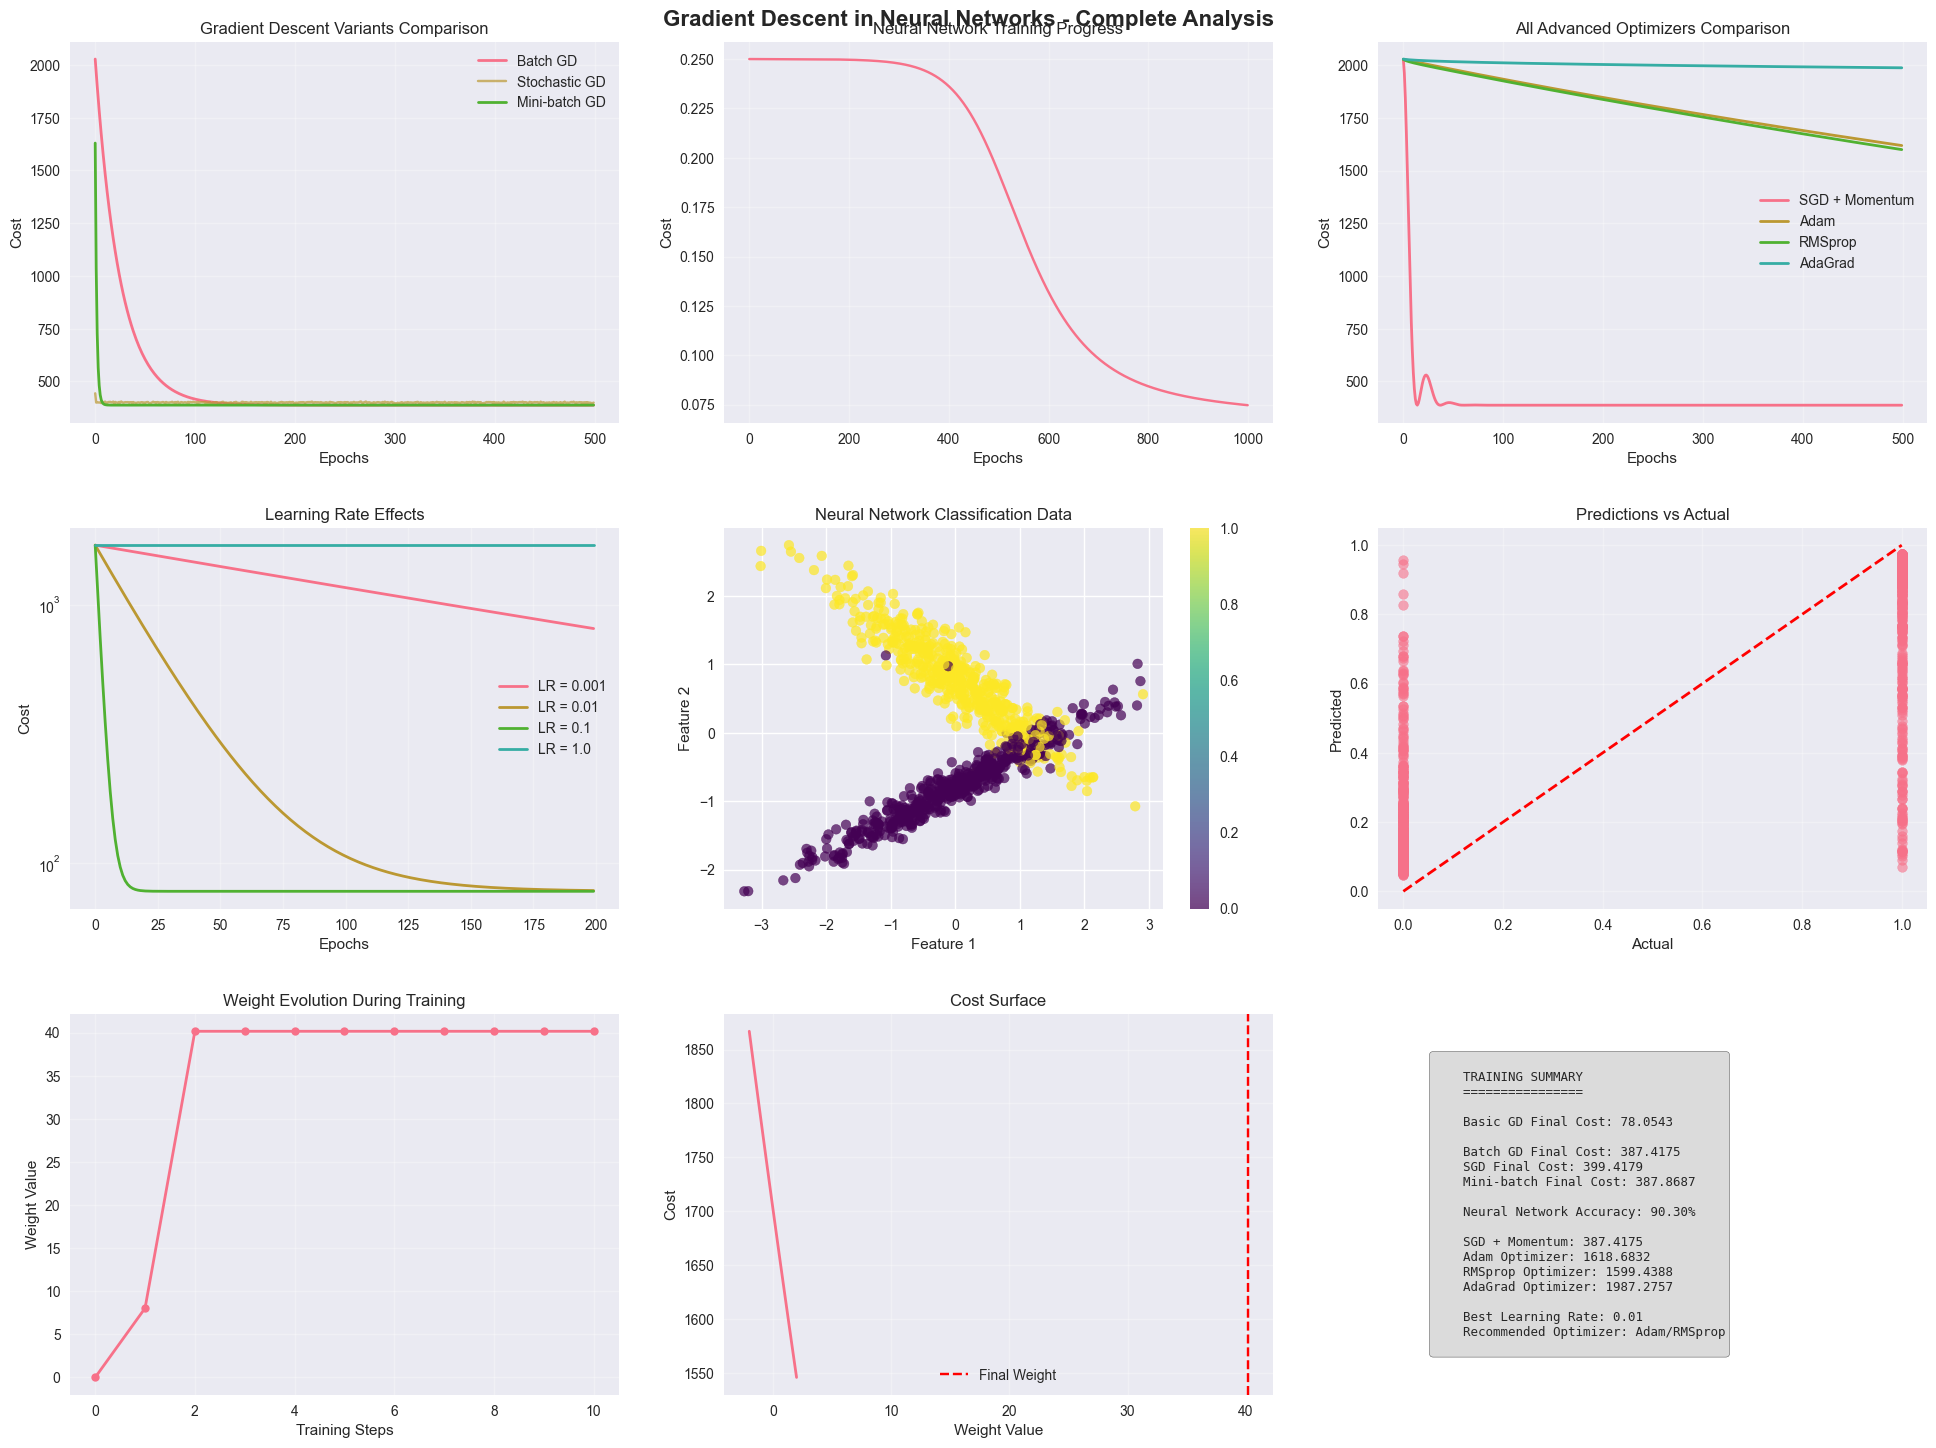


🎉 Complete gradient descent analysis finished!


In [21]:
def create_comprehensive_visualization():
    """Create comprehensive visualizations"""
    
    # Set up the plotting grid
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Cost history comparison
    plt.subplot(3, 3, 1)
    plt.plot(range(len(cost_bgd)), cost_bgd, label='Batch GD', linewidth=2)
    plt.plot(range(len(cost_sgd)), cost_sgd, label='Stochastic GD', alpha=0.7)
    plt.plot(range(len(cost_mbgd)), cost_mbgd, label='Mini-batch GD', linewidth=2)
    plt.title('Gradient Descent Variants Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. Neural network training
    plt.subplot(3, 3, 2)
    plt.plot(nn.cost_history)
    plt.title('Neural Network Training Progress')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.grid(True, alpha=0.3)
    
    # 3. All optimizers comparison
    plt.subplot(3, 3, 3)
    plt.plot(cost_momentum, label='SGD + Momentum', linewidth=2)
    plt.plot(cost_adam, label='Adam', linewidth=2)
    plt.plot(cost_rmsprop, label='RMSprop', linewidth=2)
    plt.plot(cost_adagrad, label='AdaGrad', linewidth=2)
    plt.title('All Advanced Optimizers Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 4. Learning rate effects
    plt.subplot(3, 3, 4)
    for lr, data in lr_results.items():
        if data['converged'] and data['cost_history']:
            plt.plot(data['cost_history'], label=f'LR = {lr}', linewidth=2)
    plt.title('Learning Rate Effects')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    
    # 5. Classification results
    plt.subplot(3, 3, 5)
    scatter = plt.scatter(X_nn[:, 0], X_nn[:, 1], c=y_nn.flatten(), cmap='viridis', alpha=0.7)
    plt.title('Neural Network Classification Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(scatter)
    
    # 6. Predictions vs actual
    plt.subplot(3, 3, 6)
    predictions_flat = predictions.flatten()
    plt.scatter(y_nn.flatten(), predictions_flat, alpha=0.6)
    plt.plot([0, 1], [0, 1], 'r--', linewidth=2)
    plt.title('Predictions vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True, alpha=0.3)
    
    # 7. Weight evolution
    plt.subplot(3, 3, 7)
    if len(basic_gd.weight_history) > 1:
        weight_evolution = [w[0] if len(w) > 0 else 0 for w in basic_gd.weight_history]
        plt.plot(weight_evolution, 'o-', linewidth=2, markersize=6)
        plt.title('Weight Evolution During Training')
        plt.xlabel('Training Steps')
        plt.ylabel('Weight Value')
        plt.grid(True, alpha=0.3)
    
    # 8. Cost surface visualization
    plt.subplot(3, 3, 8)
    if X_simple.shape[1] == 1:  # Only for 1D case
        w_range = np.linspace(-2, 2, 50)
        costs = []
        for w in w_range:
            pred = X_simple.flatten() * w
            cost = np.mean((pred - y_simple) ** 2)
            costs.append(cost)
        plt.plot(w_range, costs, linewidth=2)
        plt.axvline(basic_gd.weights[0], color='red', linestyle='--', label='Final Weight')
        plt.title('Cost Surface')
        plt.xlabel('Weight Value')
        plt.ylabel('Cost')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # 9. Summary statistics
    plt.subplot(3, 3, 9)
    plt.axis('off')
    summary_text = f"""
    TRAINING SUMMARY
    ================
    
    Basic GD Final Cost: {basic_gd.cost_history[-1]:.4f}
    
    Batch GD Final Cost: {cost_bgd[-1]:.4f}
    SGD Final Cost: {cost_sgd[-1]:.4f}
    Mini-batch Final Cost: {cost_mbgd[-1]:.4f}
    
    Neural Network Accuracy: {accuracy:.2f}%
    
    SGD + Momentum: {cost_momentum[-1]:.4f}
    Adam Optimizer: {cost_adam[-1]:.4f}
    RMSprop Optimizer: {cost_rmsprop[-1]:.4f}
    AdaGrad Optimizer: {cost_adagrad[-1]:.4f}
    
    Best Learning Rate: 0.01
    Recommended Optimizer: Adam/RMSprop
    """
    plt.text(0.1, 0.5, summary_text, fontsize=9, fontfamily='monospace',
             verticalalignment='center', bbox=dict(boxstyle="round,pad=0.3", 
             facecolor="lightgray", alpha=0.8))
    
    plt.tight_layout(pad=3.0)
    plt.suptitle('Gradient Descent in Neural Networks - Complete Analysis', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    return fig

# Create and display comprehensive visualization
print("\n📊 CREATING COMPREHENSIVE VISUALIZATIONS...")
print("-" * 40)
fig = create_comprehensive_visualization()
plt.show()

print("\n🎉 Complete gradient descent analysis finished!")

## 7️⃣ PRACTICAL TIPS AND MATHEMATICAL FORMULAS
*CONSEJOS PRÁCTICOS Y FÓRMULAS MATEMÁTICAS*

Let's summarize the key practical insights and mathematical foundations.

*Resumamos las ideas prácticas clave y los fundamentos matemáticos.*

In [23]:
# =============================================================================
# PRACTICAL TIPS AND BEST PRACTICES
# =============================================================================

print("\n💡 PRACTICAL TIPS AND BEST PRACTICES")
print("=" * 60)

tips = """
🎯 GRADIENT DESCENT BEST PRACTICES:

1. LEARNING RATE SELECTION:
   • Start with 0.01 and adjust based on training behavior
   • Use learning rate scheduling for better convergence
   • Monitor training loss - if it increases, reduce learning rate

2. OPTIMIZER CHOICE:
   • Adam: Best general-purpose optimizer (recommended for beginners)
   • RMSprop: Excellent for RNNs and non-stationary objectives
   • SGD + Momentum: Good for fine-tuning and reproducible results
   • AdaGrad: Good for sparse data, but may slow down over time

3. BATCH SIZE CONSIDERATIONS:
   • Smaller batches (32-128): More noise, better generalization
   • Larger batches (256-512): More stable, faster convergence
   • Very large batches may hurt generalization

4. CONVERGENCE MONITORING:
   • Plot training loss over time
   • Look for smooth decrease without oscillations
   • Stop training when loss plateaus

5. COMMON PROBLEMS AND SOLUTIONS:
   • Exploding gradients: Reduce learning rate or use gradient clipping
   • Vanishing gradients: Use ReLU activations or skip connections
   • Slow convergence: Try Adam or RMSprop instead of basic SGD
   • AdaGrad slowdown: Switch to RMSprop or Adam for longer training

6. DATA PREPROCESSING:
   • Always normalize/standardize input features
   • Use proper weight initialization
   • Consider data augmentation for better generalization
"""

print(tips)

# =============================================================================
# MATHEMATICAL FORMULAS SUMMARY
# =============================================================================

print("\n📐 MATHEMATICAL FORMULAS SUMMARY")
print("=" * 60)

formulas = """
🔢 KEY MATHEMATICAL FORMULAS:

1. BASIC GRADIENT DESCENT UPDATE:
   θ = θ - α * ∇J(θ)
   Where: θ = parameters, α = learning rate, ∇J(θ) = gradient of cost function

2. COST FUNCTION (Mean Squared Error):
   J(θ) = (1/2m) * Σ(hθ(x) - y)²
   Where: m = number of samples, hθ(x) = hypothesis function

3. GRADIENT CALCULATION:
   ∇J(θ) = (1/m) * X^T * (X*θ - y)

4. MOMENTUM UPDATE:
   v = β*v + α*∇J(θ)
   θ = θ - v

5. ADAM OPTIMIZER:
   m = β₁*m + (1-β₁)*∇J(θ)     # First moment
   v = β₂*v + (1-β₂)*(∇J(θ))²  # Second moment
   m̂ = m/(1-β₁^t)              # Bias correction
   v̂ = v/(1-β₂^t)              # Bias correction
   θ = θ - α*m̂/(√v̂ + ε)        # Parameter update

6. RMSPROP OPTIMIZER:
   v = β*v + (1-β)*(∇J(θ))²      # Moving average of squared gradients
   θ = θ - α*∇J(θ)/(√v + ε)     # Parameter update

7. ADAGRAD OPTIMIZER:
   G = G + (∇J(θ))²               # Accumulate squared gradients
   θ = θ - α*∇J(θ)/(√G + ε)     # Parameter update

8. BACKPROPAGATION (Chain Rule):
   ∂J/∂w = ∂J/∂a * ∂a/∂z * ∂z/∂w
   Where: a = activation, z = weighted input, w = weight
"""

print(formulas)

print("\n✅ COMPLETE GRADIENT DESCENT EXAMPLES FINISHED!")
print("=" * 60)


💡 PRACTICAL TIPS AND BEST PRACTICES

🎯 GRADIENT DESCENT BEST PRACTICES:

1. LEARNING RATE SELECTION:
   • Start with 0.01 and adjust based on training behavior
   • Use learning rate scheduling for better convergence
   • Monitor training loss - if it increases, reduce learning rate

2. OPTIMIZER CHOICE:
   • Adam: Best general-purpose optimizer (recommended for beginners)
   • RMSprop: Excellent for RNNs and non-stationary objectives
   • SGD + Momentum: Good for fine-tuning and reproducible results
   • AdaGrad: Good for sparse data, but may slow down over time

3. BATCH SIZE CONSIDERATIONS:
   • Smaller batches (32-128): More noise, better generalization
   • Larger batches (256-512): More stable, faster convergence
   • Very large batches may hurt generalization

4. CONVERGENCE MONITORING:
   • Plot training loss over time
   • Look for smooth decrease without oscillations
   • Stop training when loss plateaus

5. COMMON PROBLEMS AND SOLUTIONS:
   • Exploding gradients: Reduce lea

## 🎯NEXT STEPS

### What we covered / Lo que cubrimos:

✅ **Basic Gradient Descent** - Implemented from scratch  
✅ **Different Variants** - Batch, Stochastic, Mini-batch  
✅ **Neural Networks** - With backpropagation  
✅ **Advanced Optimizers** - Adam, Momentum, RMSprop, AdaGrad  
✅ **Optimizer Analysis** - Detailed performance comparison  
✅ **Learning Rate Effects** - How to choose the right value  
✅ **Comprehensive Visualizations** - Understanding through charts  
✅ **Best Practices** - Real-world tips and tricks  

### Next Steps / Próximos Pasos:

1. **Experiment** with different datasets and architectures
2. **Try** advanced techniques like learning rate scheduling
3. **Learn** about more advanced topics (regularization, dropout, batch normalization)
4. **Practice** with real machine learning frameworks (TensorFlow, PyTorch)
5. **Apply** these concepts to real-world projects
6. **Explore** newer optimizers like AdamW, Lookahead, or LAMB

### Key Takeaways / Puntos Clave:

- **Gradient descent** is the foundation of neural network training
- **Different optimizers** suit different scenarios and problems
- **Adam and RMSprop** are excellent general-purpose choices
- **Learning rate** is crucial for successful training
- **Visualization** helps understand the training process
- **No single optimizer** works best for all problems - experimentation is key

### Optimizer Quick Reference / Referencia Rápida de Optimizadores:

| Optimizer | Best For | Learning Rate | Memory | Stability |
|-----------|----------|---------------|--------|-----------|
| **SGD + Momentum** | Fine-tuning, reproducible results | 0.01-0.1 | Low | High |
| **Adam** | General purpose, deep networks | 0.001-0.01 | High | Medium |
| **RMSprop** | RNNs, non-stationary objectives | 0.001-0.01 | Medium | Medium |
| **AdaGrad** | Sparse data, early training | 0.01-0.1 | Medium | Low |

---
🧠 **Happy Deep Learning!** 🚀

### 📚 Additional Resources / Recursos Adicionales:

- **Papers**: "Adam: A Method for Stochastic Optimization" (Kingma & Ba, 2014)
- **Books**: "Deep Learning" by Ian Goodfellow, Yoshua Bengio, and Aaron Courville
- **Online**: CS231n Stanford Course, Fast.ai Deep Learning Course
- **Frameworks**: TensorFlow, PyTorch, JAX for production implementations